In [25]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate

In [45]:
def K(t,p):
    return -3*np.abs(1-t)/(32*p**6*t)*(1+(10+8*p**2 + 4*p**4)*t+t**2) + \
            (3*(1+t))/(8*p**5)*((3+3*p**2+p**4)/np.sqrt(1+p**2) - (3+2*p**2)/(2*p)*(2*np.arcsinh(p) -np.abs(np.log(t))))

def K_s(s, p):
    es = np.exp(s)
    return(K(es, p)*es)

def K_int(t, f, **kwargs):
    return integrate.quad(lambda p: f(p, **kwargs)*K(t,p), 0, np.inf)[0]

def f_cr(p, alpha, p1, p2):
    return (alpha -1)*p**(-1*alpha)/(p1**(1-alpha)-p2**(1-alpha))

# Replicating fig 2 in Enslin 2000

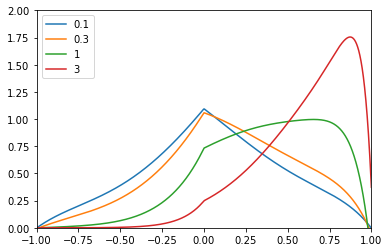

In [22]:
#This replicates the photon scattering probability function, called K(t,P) here and in zubair's paper and P in Enslin 2000
#The plot is of the log freq shift version but also validates K

s_space = np.linspace(-3.6,3.6,10000)
ps = [0.1, 0.3, 1, 3]
s_max_p = [0.2, 0.6, 1.8, 3.6]

for i, p in enumerate(ps):
    x = s_space/s_max_p[i]
    y = K_s(s_space, p)*s_max_p[i]
    plt.plot(x,y, label = str(p))
    
plt.xlim(-1,1)
plt.ylim(0, 2)
plt.legend()
plt.show()

In [46]:
K_int(2,f_cr, alpha=2.5, p1=1, p2=10000)

<ipython-input-45-48cbcf3af1cc>:10: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(lambda p: f(p, **kwargs)*K(t,p), 0, np.inf)[0]


-7.408000085810545e+60